In [3]:
# 모듈 임포트
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# 트레이닝 데이터 로드
x_data = pd.read_csv('C:\\Users\\zeus_\\Desktop\\champion_data\\train\\train_activity.csv').sort_values(by='acc_id', ascending=True)
y_data = pd.read_csv('C:\\Users\\zeus_\\Desktop\\champion_data\\train\\train_label.csv').sort_values(by='acc_id', ascending=True)

In [5]:
# 트레이닝데이터 아이디별로 그룹화 및 평균
# 데이터의 시계열 특성이 사라지지만, 빨리 단순 회귀 모형을 볼 수 있음
x_data = x_data.groupby(by='acc_id').mean().values
y_data = y_data.label.values

In [6]:
#트레이닝셋, 발리데이션셋 구분
x_train = x_data[0:int(0.7 * len(x_data)),:]
y_train = y_data[0:int(0.7 * len(x_data))]

x_cv = x_data[int(0.7 * len(x_data)):,:]
y_cv = y_data[int(0.7 * len(x_data)):]

### 랜덤 포레스트
---

In [7]:
forest = RandomForestClassifier(n_estimators=50, random_state=0, n_jobs=-1, max_features=10, max_depth=20)

In [8]:
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [23]:
print("훈련 세트 정확도: {:.3f}".format(forest.score(x_train, y_train)))

훈련 세트 정확도: 0.875


In [24]:
print("크로스발리데이션 세트 정확도: {:.3f}".format(forest.score(x_cv, y_cv)))

크로스발리데이션 세트 정확도: 0.716


In [25]:
def plot_feature_importances(model):
    n_features = 37
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), list(range(37)))
    plt.xlabel("feature importances")
    plt.ylabel("feature index")
    plt.ylim(-1, n_features)

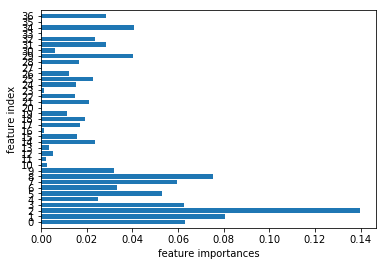

In [26]:
plot_feature_importances(forest)

In [109]:
# 테스트 데이터 로드
x_test_temp = pd.read_csv('C:\\Users\\zeus_\\Desktop\\champion_data\\test\\test_activity.csv').sort_values(by='acc_id', ascending=True)

In [110]:
#value
x_test = x_test_temp.groupby(by='acc_id').mean().values

In [112]:
#예측
label = forest.predict(x_test)

In [113]:
acc_id = x_test_temp.groupby(by='acc_id').mean().index

data = {'acc_id':acc_id, 'label':label}

In [114]:
result = pd.DataFrame(data)

In [115]:
result.to_csv('C:\\Users\\zeus_\\Desktop\\champion_data\\test\\result\\04_simple_random_foresting.csv')